In [1]:
import os
import scipy
import shutil, sys, random
import zipfile
import matplotlib.pyplot as plt
import tensorflow as tf
from shutil import copyfile
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    # Invalid device or cannot modify virtual devices once initialized.
    pass

In [3]:
# import os
# os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [4]:
!git clone https://github.com/Bangkit-C23-PS311/Dataset-kata.git tmp/Data

Cloning into 'tmp/Data'...
remote: Enumerating objects: 173, done.
remote: Total 173 (delta 0), reused 0 (delta 0), pack-reused 173
Receiving objects: 100% (173/173), 103.60 MiB | 32.99 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [5]:
!rm -rf tmp/Data/.git

In [6]:
# ! pip install -q kaggle

In [7]:
# from google.colab import files
# files.upload()
# ! mkdir ~/.kaggle
# ! cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json


In [8]:
# ! kaggle datasets list
# ! kaggle datasets download -d 'mlanangafkaar/datasets-lemlitbang-sibi-alphabets' -p '/tmp/'
# ! mkdir "/tmp/dataSibi"

In [9]:
# from google.colab import drive
# drive.mount('/content/drive')

In [10]:
# ! unzip "/tmp/datasets-lemlitbang-sibi-alphabets.zip" -d "/tmp/dataSibi"

In [11]:
for directories in os.listdir("tmp/Data"):
    if not directories.startswith('.'):
        dir = os.path.join("tmp/Data", directories)
        print(f"There are {len(os.listdir(dir))} images of {directories}.")

There are 39 images of Tolong.
There are 38 images of Terimakasih.
There are 39 images of Maaf.
There are 39 images of Halo.


In [12]:
root_dir = 'tmp/sibi'
training_dirs = []
validation_dirs = []

for i in os.listdir("tmp/Data"):
    if not i.startswith('.'):
        training_dirs.append(os.path.join(root_dir, 'training', i))
        validation_dirs.append(os.path.join(root_dir, 'validation', i))

if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

def create_train_val_dirs(dirs):
  for dir in dirs:
    os.makedirs(dir)
  pass

try:
  create_train_val_dirs(training_dirs)
  create_train_val_dirs(validation_dirs)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [13]:
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
  actual_image = []
  for file in os.listdir(SOURCE_DIR):
    if os.path.getsize(os.path.join(SOURCE_DIR, file)) > 1:
      actual_image.append(file)
    else:
      print("{} is zero length, so ignoring.".format(file))
  
  random.shuffle(actual_image)

  split_index = int(len(actual_image) * SPLIT_SIZE)

  [copyfile(os.path.join(SOURCE_DIR, file), os.path.join(TRAINING_DIR, file)) for file in actual_image[:split_index]]
  [copyfile(os.path.join(SOURCE_DIR, file), os.path.join(VALIDATION_DIR, file)) for file in actual_image[split_index:]]
  pass


  ### END CODE HERE

In [14]:
for directories in os.listdir("tmp/Data"):
    if not directories.startswith('.'):
      SOURCE_DIR = os.path.join("tmp/Data", directories)
      TRAINING_DIR = "tmp/sibi/training/"
      VALIDATION_DIR = "tmp/sibi/validation/"

      TRAINING_X_DIR = os.path.join(TRAINING_DIR, directories)
      VALIDATION_X_DIR = os.path.join(VALIDATION_DIR, directories)

      if len(os.listdir(TRAINING_X_DIR)) > 0:
        for file in os.scandir(TRAINING_X_DIR):
          os.remove(file.path)
      if len(os.listdir(VALIDATION_X_DIR)) > 0:
        for file in os.scandir(VALIDATION_X_DIR):
          os.remove(file.path)

      split_size = .8
      split_data(SOURCE_DIR, TRAINING_X_DIR, VALIDATION_X_DIR, split_size)

      print(f"There are {len(os.listdir(TRAINING_X_DIR))} images of {directories} for training")
      print(f"There are {len(os.listdir(VALIDATION_X_DIR))} images of {directories} for validation\n")

There are 31 images of Tolong for training
There are 8 images of Tolong for validation

There are 30 images of Terimakasih for training
There are 8 images of Terimakasih for validation

There are 31 images of Maaf for training
There are 8 images of Maaf for validation

There are 31 images of Halo for training
There are 8 images of Halo for validation



In [15]:
# dir_files = "/tmp/dataSibi/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02"
# for directories in os.listdir(os.path.join(dir_files, 'training')): 
#   SOURCE_DIR = os.path.join(dir_files, 'training', directories)
#   TRAINING_DIR = "/tmp/sibi/training/"
#   VALIDATION_DIR = "/tmp/sibi/validation/"

#   TRAINING_X_DIR = os.path.join(TRAINING_DIR, directories)
#   VALIDATION_X_DIR = os.path.join(VALIDATION_DIR, directories)

#   # if len(os.listdir(TRAINING_X_DIR)) > 0:
#   #   for file in os.scandir(TRAINING_X_DIR):
#   #     os.remove(file.path)
#   # if len(os.listdir(VALIDATION_X_DIR)) > 0:
#   #   for file in os.scandir(VALIDATION_X_DIR):
#   #     os.remove(file.path)

#   split_size = 1.0
#   split_data(SOURCE_DIR, TRAINING_X_DIR, VALIDATION_X_DIR, split_size)

#   print(f"There are {len(os.listdir(TRAINING_X_DIR))} images of {directories} for training")
#   print(f"There are {len(os.listdir(VALIDATION_X_DIR))} images of {directories} for validation\n")

In [16]:
print("Sample X image:")
sample_image = load_img(os.path.join(TRAINING_X_DIR, os.listdir(TRAINING_X_DIR)[8]))
print(TRAINING_X_DIR)
sample_array = img_to_array(sample_image)
print(f"Each image has shape: {sample_array.shape}")
# plt.imshow(load_img("tmp/sibi/training/Z/IMG_20230526_142628 (Copy).jpg"))

Sample X image:
tmp/sibi/training/Halo
Each image has shape: (1443, 1080, 3)


In [17]:
# from PIL import Image

# image_path = 'tmp/sibi/training/Z/IMG_20230526_142446 (Copy).jpg'
# image = Image.open(image_path) 

# image.show()

In [18]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
    train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   horizontal_flip = True)
    train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=32, 
                                                      class_mode='categorical',
                                                      target_size=(224, 224))
    
#     for i in range(5):  # Change the number to preview more or fewer images
#         batch = train_generator.next()
# #         print(batch)
#         image = batch[0]  # Retrieve the image from the batch
#         plt.imshow(image[0])
#         plt.axis('off')  # Remove axes
#         plt.show()

    validation_datagen = ImageDataGenerator(rescale = 1./255)

  # Pass in the appropriate arguments to the flow_from_directory method
    validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=32, 
                                                                class_mode='categorical',
                                                                target_size=(224, 224))
  ### END CODE HERE
    return train_generator, validation_generator

In [19]:
# for i in range(5):  # Change the number to preview more or fewer images
#     batch = train_generator.next()
#     image = batch[0]  # Retrieve the image from the batch
#     plt.imshow(image[0])
#     plt.axis('off')  # Remove axes
#     plt.show()

In [20]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 123 images belonging to 4 classes.
Found 32 images belonging to 4 classes.


In [21]:
base_model=tf.keras.applications.MobileNetV2(weights='imagenet', input_shape=(224, 224, 3), include_top=False)

9406464/9406464 [==============================] - 0s 0us/step


In [22]:
for layers in base_model.layers:
     layers.trainable = False

In [23]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [24]:
total_params = base_model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in base_model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 2,257,984 total parameters in this model.
There are 0 trainable parameters in this model.


In [25]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.999):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

In [26]:
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(128,activation='relu')(x)
x = tf.keras.layers.Dense(64,activation='relu')(x) 
x = tf.keras.layers.Dense(4,activation='softmax')(x)

In [27]:
model = Model(inputs=base_model.input, outputs=x)

In [28]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [29]:
model.compile(optimizer = 'adam', 
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

In [30]:
total_params = model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 2,430,468 total parameters in this model.
There are 172,484 trainable parameters in this model.


In [31]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(1024, (3,3), activation='relu', input_shape=(100, 150,3)),
#     tf.keras.layers.MaxPooling2D((2,2)),
#     tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D((2,2)),
#     tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D((2,2)),
#     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D((2,2)),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(512, activation='relu'),
#     tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(26, activation='softmax'),
# ])

# model.compile(optimizer = 'adam', 
#                 loss = 'categorical_crossentropy',
#                 metrics = ['accuracy'])

In [32]:
# total_params = model.count_params()
# num_trainable_params = sum([w.shape.num_elements() for w in model.trainable_weights])

# print(f"There are {total_params:,} total parameters in this model.")
# print(f"There are {num_trainable_params:,} trainable parameters in this model.")

In [33]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [34]:
callbacks = myCallback()
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 100,
                    # verbose = 2,
                    callbacks=callbacks)

Epoch 1/100
4/4 [==============================] - 35s 6s/step - loss: 1.3214 - accuracy: 0.4472 - val_loss: 0.8340 - val_accuracy: 0.6562
Epoch 2/100
4/4 [==============================] - 21s 6s/step - loss: 0.6643 - accuracy: 0.8293 - val_loss: 0.4845 - val_accuracy: 0.8750
Epoch 3/100
4/4 [==============================] - 22s 5s/step - loss: 0.4171 - accuracy: 0.8455 - val_loss: 0.3127 - val_accuracy: 0.9688
Epoch 4/100
4/4 [==============================] - 21s 6s/step - loss: 0.2108 - accuracy: 0.9593 - val_loss: 0.2106 - val_accuracy: 1.0000
Epoch 5/100
4/4 [==============================] - ETA: 0s - loss: 0.1286 - accuracy: 1.0000
Reached 99.9% accuracy so cancelling training!
4/4 [==============================] - 21s 6s/step - loss: 0.1286 - accuracy: 1.0000 - val_loss: 0.1605 - val_accuracy: 0.9688


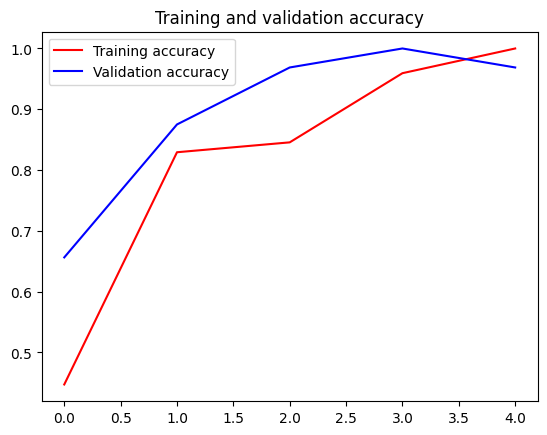

<Figure size 640x480 with 0 Axes>

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [36]:
import datetime
current_date = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

export_dir = f"model/{current_date}"
tf.saved_model.save(model, export_dir)

In [37]:
# Select mode of optimization
mode = "" 

if mode == 'Storage':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
    optimization = tf.lite.Optimize.DEFAULT

In [38]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir) # YOUR CODE HERE

# Set the optimzations
converter.optimizations = [optimization] # YOUR CODE HERE

# Invoke the converter to finally generate the TFLite model
tflite_model = converter.convert() # YOUR CODE HERE

In [39]:
import pathlib
tflite_model_file = pathlib.Path(f"./{export_dir}/model.tflite")
tflite_model_file.write_bytes(tflite_model)

2674424

# Test the Model with TFLite Interpreter 

In [40]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]["index"]
input_shape = interpreter.get_input_details()[0]['shape']
output_index = interpreter.get_output_details()[0]["index"]

In [41]:
test_generator = ImageDataGenerator(rescale=1./255)
test_batches = test_generator.flow_from_directory(
    VALIDATION_DIR,
    target_size=(input_shape[1], input_shape[2]),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

Found 32 images belonging to 4 classes.


In [42]:
input_index

0

In [43]:
import numpy as np
predictions = []
test_labels = []
test_images = []

num_batches = 50
for _ in range(num_batches):
    img, label = next(test_batches)
    interpreter.set_tensor(input_index, img)
    interpreter.invoke()
    predictions.append(interpreter.get_tensor(output_index))
    test_labels.append(label[0])
    test_images.append(np.array(img))

In [44]:
# Utilities functions for plotting

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    img = np.squeeze(img)
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    true_label = np.argmax(true_label)
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
        
        
    class_names = ['Halo', 'Maaf', 'Terimakasih', 'Tolong']
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(list(range(6)))
    plt.yticks([])
    thisplot = plt.bar(range(4), predictions_array[0], color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array[0])
    true_label = np.argmax(true_label)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

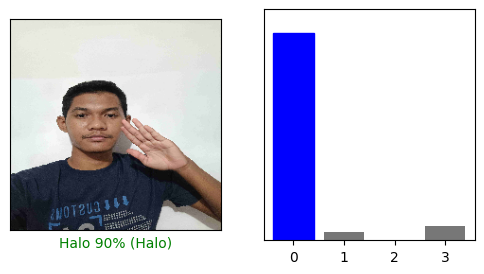

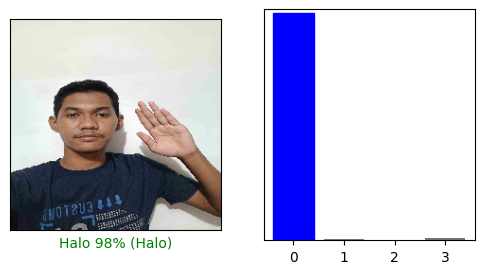

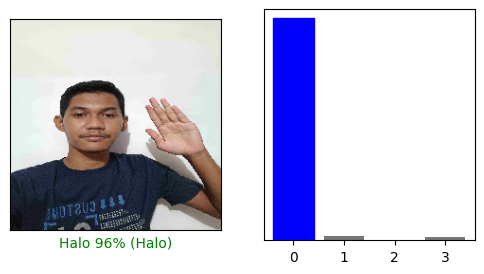

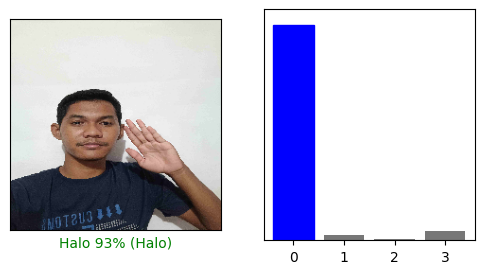

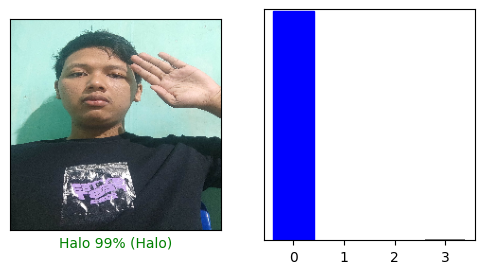

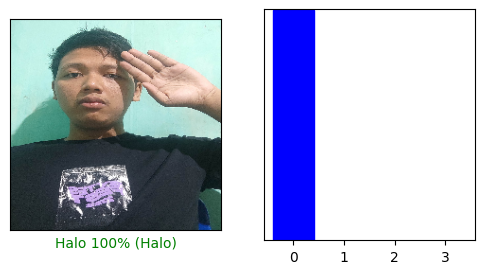

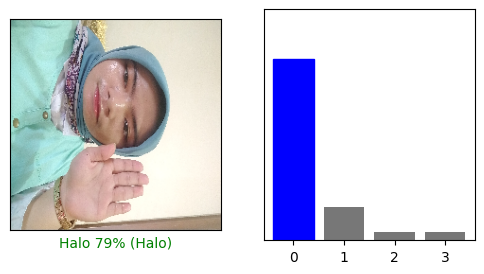

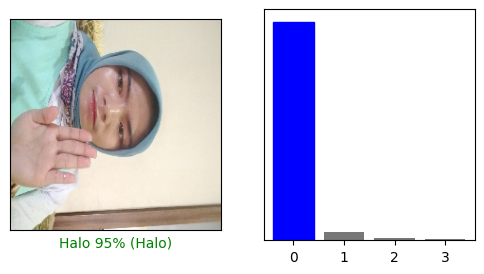

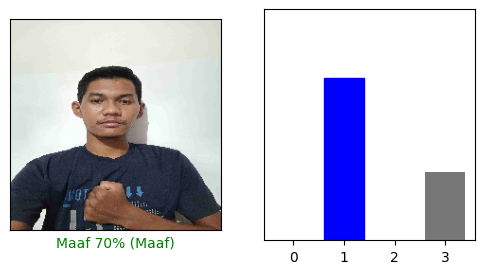

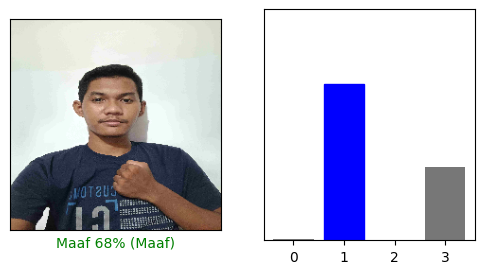

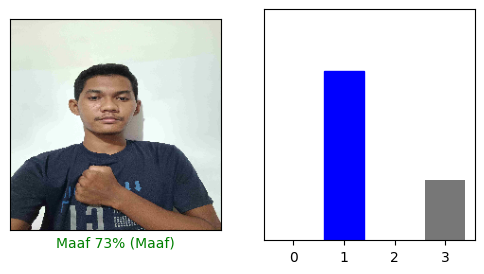

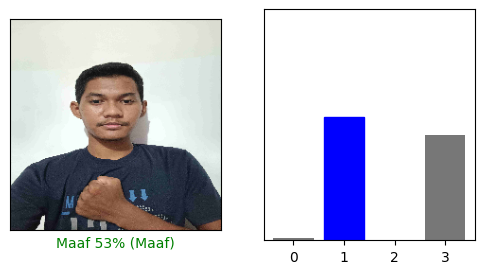

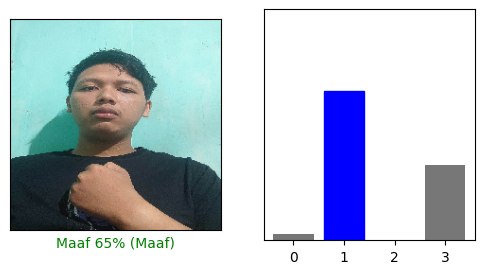

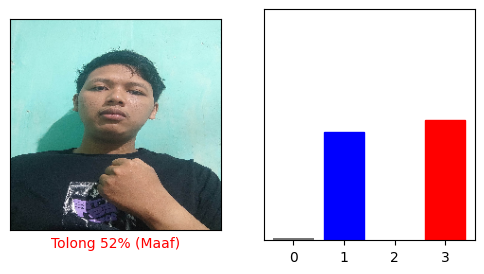

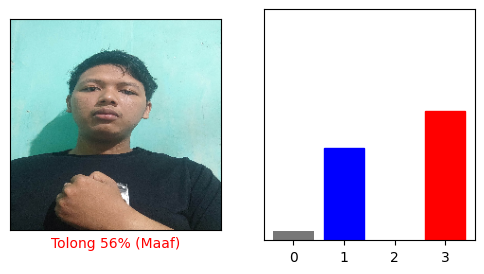

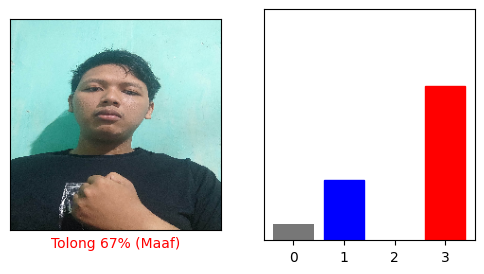

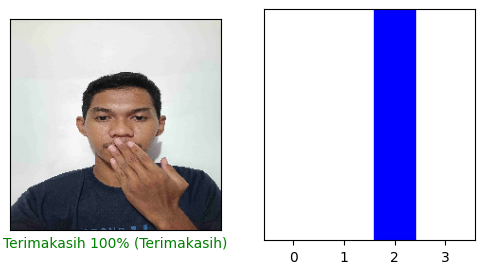

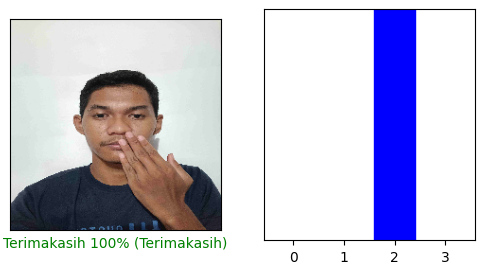

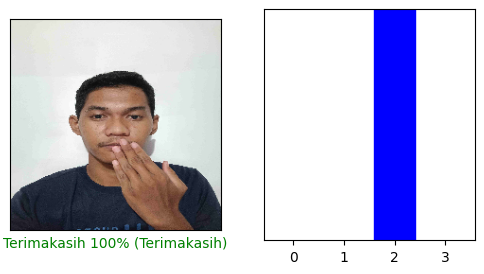

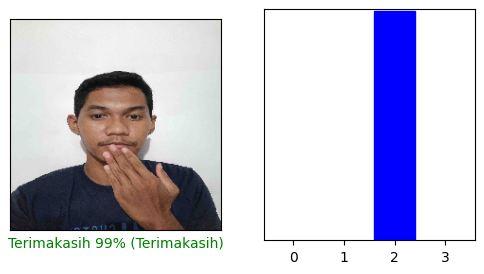

In [45]:
# Visualize the outputs

# Select index of image to display. Minimum index value is 1 and max index value is 50. 

for index in range(20):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(index, predictions, test_labels, test_images)
    plt.subplot(1,2,2)
    plot_value_array(index, predictions, test_labels)
    plt.show()